# Problem Statement
* The dataset comprises of  data for red wine quality on basisnon features that the wine has.
* The problem is a multiclass problem and we need to create model that predict the quality of the wine based on other features.
* Prediction result can be used by manufsacture to improve the quality of the wine and the consumer can be used knowing the quality of wine.

**Description of attributes:**
1 - fixed acidity: most acids involved with wine or fixed or nonvolatile (do not evaporate readily)

2 - volatile acidity: the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste

3 - citric acid: found in small quantities, citric acid can add 'freshness' and flavor to wines

4 - residual sugar: the amount of sugar remaining after fermentation stops, it's rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet

5 - chlorides: the amount of salt in the wine

6 - free sulfur dioxide: the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine

7 - total sulfur dioxide: amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine

8 - density: the density of water is close to that of water depending on the percent alcohol and sugar content

9 - pH: describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale

10 - sulphates: a wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial and antioxidant

11 - alcohol: the percent alcohol content of the wine

Output variable (based on sensory data): 12 - quality (score between 0 and 10)

According to experts, the wine is differentiated according to its smell, flavor, and color, but we are not a wine expert to say that wine is good or bad. What will we do then? Here’s the use of Machine Learning comes, yes you are thinking to write we are using machine learning to check wine quality. ML have some techniques that will discuss below:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter('ignore')

from sklearn.preprocessing import StandardScaler,normalize,minmax_scale
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report,accuracy_score

from sklearn.model_selection import train_test_split


In [2]:
df=pd.read_csv('C:/Users/NBALUDEO/Desktop/ML project/Supervised ML/winequality-red.csv')

In [3]:
df.shape

(1599, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
# Data Sorted
df.sort_values(by=['quality'])

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1478,7.1,0.875,0.05,5.7,0.082,3.0,14.0,0.99808,3.40,0.52,10.2,3
832,10.4,0.440,0.42,1.5,0.145,34.0,48.0,0.99832,3.38,0.86,9.9,3
899,8.3,1.020,0.02,3.4,0.084,6.0,11.0,0.99892,3.48,0.49,11.0,3
1374,6.8,0.815,0.00,1.2,0.267,16.0,29.0,0.99471,3.32,0.51,9.8,3
459,11.6,0.580,0.66,2.2,0.074,10.0,47.0,1.00080,3.25,0.57,9.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
495,10.7,0.350,0.53,2.6,0.070,5.0,16.0,0.99720,3.15,0.65,11.0,8
1403,7.2,0.330,0.33,1.7,0.061,3.0,13.0,0.99600,3.23,1.10,10.0,8
1090,10.0,0.260,0.54,1.9,0.083,42.0,74.0,0.99451,2.98,0.63,11.8,8
1449,7.2,0.380,0.31,2.0,0.056,15.0,29.0,0.99472,3.23,0.76,11.3,8


**Check data if there is missing or not**

In [6]:
def missing_value(dt):
    mydict={}
    lst=[]
    for i in dt.columns:
        if dt[i].isnull().sum()>0:
            mydict[i]=[(dt(i).isnull().sum()*100)/len(dt)][0][i]
            
    for j,k in mydict.items():
        lst.append(j)
    if len(lst)==0:
        message={"Message": "This dataset doesn't have any null values , kindly proceed with the EDA "}
        return message
    else:
            return mydict
missing_value(df)
    

{'Message': "This dataset doesn't have any null values , kindly proceed with the EDA "}

In [7]:
new_df=df.rename(columns={'fixed acidity':'fixed_acidity','volatile acidity':'volatile_acidity','citric acid':'citric_acid',
                     'free sulfur dioxide':'free_sulfur_dioxide','total sulfur dioxide':'total_sulfur_dioxide','residual sugar':'residual_sugar'})

* There are no null values in this dataset

**Duplicate Entry check**

In [8]:
new_df.duplicated().sum()

240

In [9]:
new_df.drop_duplicates(inplace=True)

**Observation**

There are 240 duplicates. the quality rating for the same rating because given by different wine tester so there is possibility for similar review.

# EDA

Target variable is descreate and categorical nature.

In [10]:
# Rating count each rating column
new_df['quality'].value_counts()

quality
5    577
6    535
7    167
4     53
8     17
3     10
Name: count, dtype: int64

<Axes: xlabel='quality', ylabel='count'>

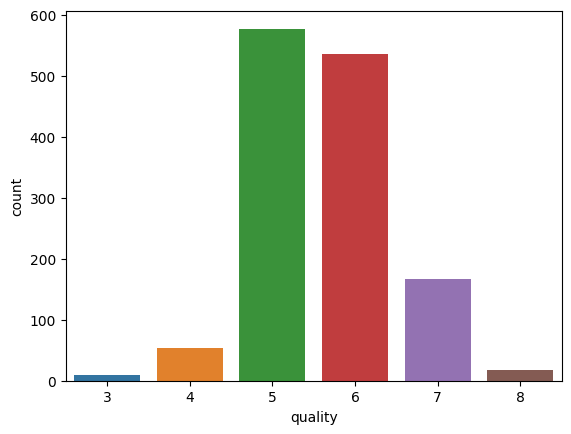

In [11]:
sns.countplot(x='quality',data=new_df)

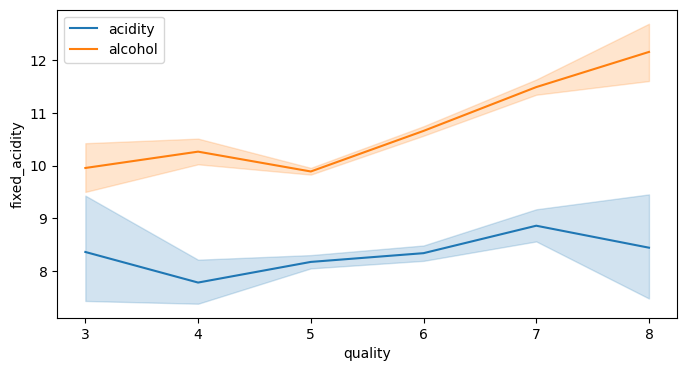

In [12]:
plt.figure(figsize=(8,4))
sns.lineplot(data=new_df,x='quality',y='fixed_acidity',label='acidity')
sns.lineplot(data=new_df,x='quality',y='alcohol',label='alcohol')
plt.legend()

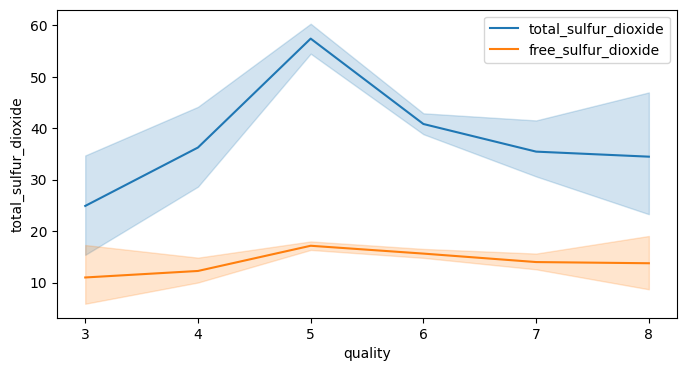

In [13]:

plt.figure(figsize=(8,4))
sns.lineplot(data=new_df,x='quality',y='total_sulfur_dioxide',label='total_sulfur_dioxide')
sns.lineplot(data=new_df,x='quality',y='free_sulfur_dioxide',label='free_sulfur_dioxide')
plt.legend()

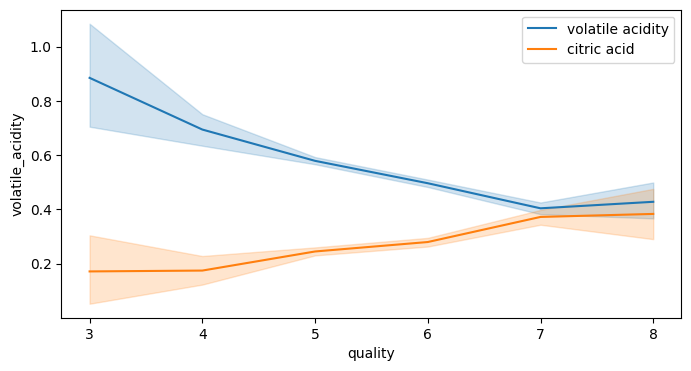

In [14]:
plt.figure(figsize=(8,4))
sns.lineplot(y='volatile_acidity',x='quality',data=new_df,label='volatile acidity')
sns.lineplot(y='citric_acid',x='quality',data=new_df,label='citric acid')
plt.legend()
plt.show()


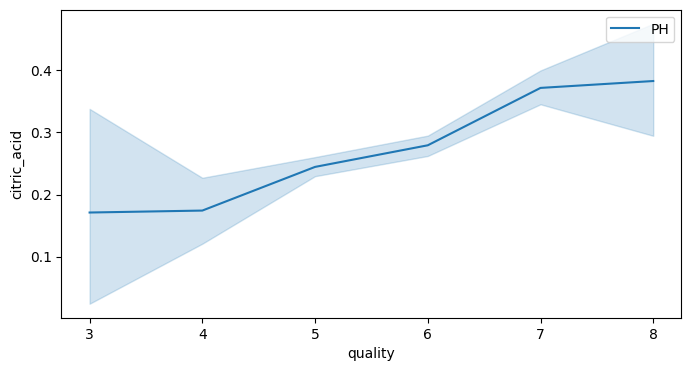

In [15]:
plt.figure(figsize=(8,4))
sns.lineplot(y='citric_acid',x='quality',data=new_df,label='PH')
plt.legend()

**Plot b/w total sulphur dioxide and free sulphur dioxide**

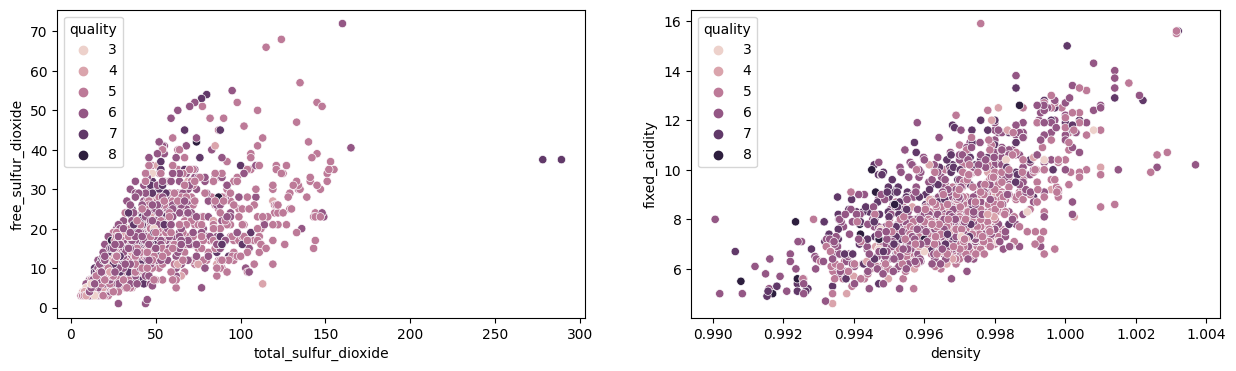

In [16]:
plt.figure(figsize=(15,4))
plt.subplot(121)
sns.scatterplot(x='total_sulfur_dioxide',y='free_sulfur_dioxide',data=new_df,hue='quality')
plt.subplot(122)
sns.scatterplot(x='density',y='fixed_acidity',data=new_df,hue='quality')
plt.show()

**Quality of wine varies b/w 3-8,and the below plot give information about how the quality changes with respect to volatile acidity**

<Axes: xlabel='quality', ylabel='chlorides'>

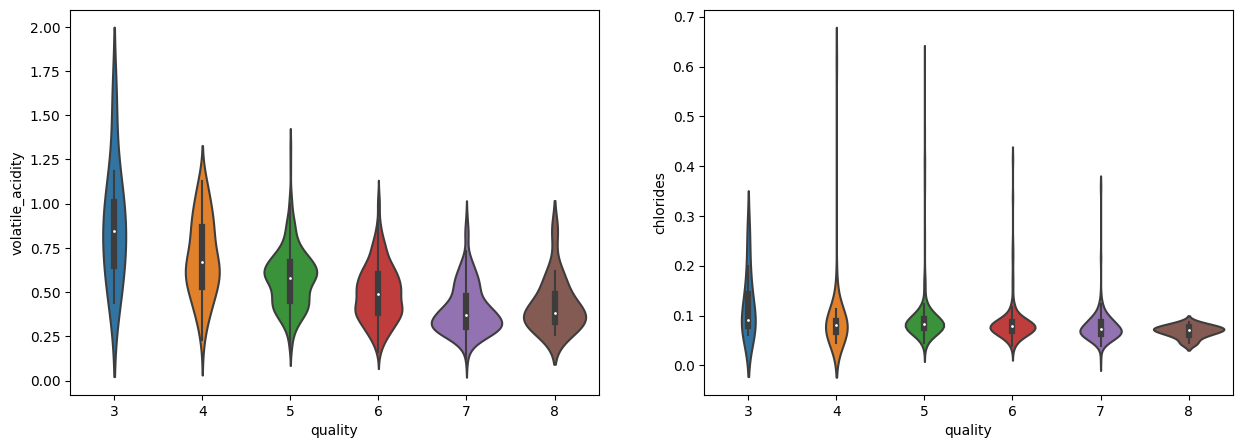

In [17]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.violinplot(x='quality',y='volatile_acidity',data=new_df)
plt.subplot(1,2,2)
sns.violinplot(x='quality',y='chlorides',data=new_df)

 Observation 

* The quality has most rating gives to 5,6,7 

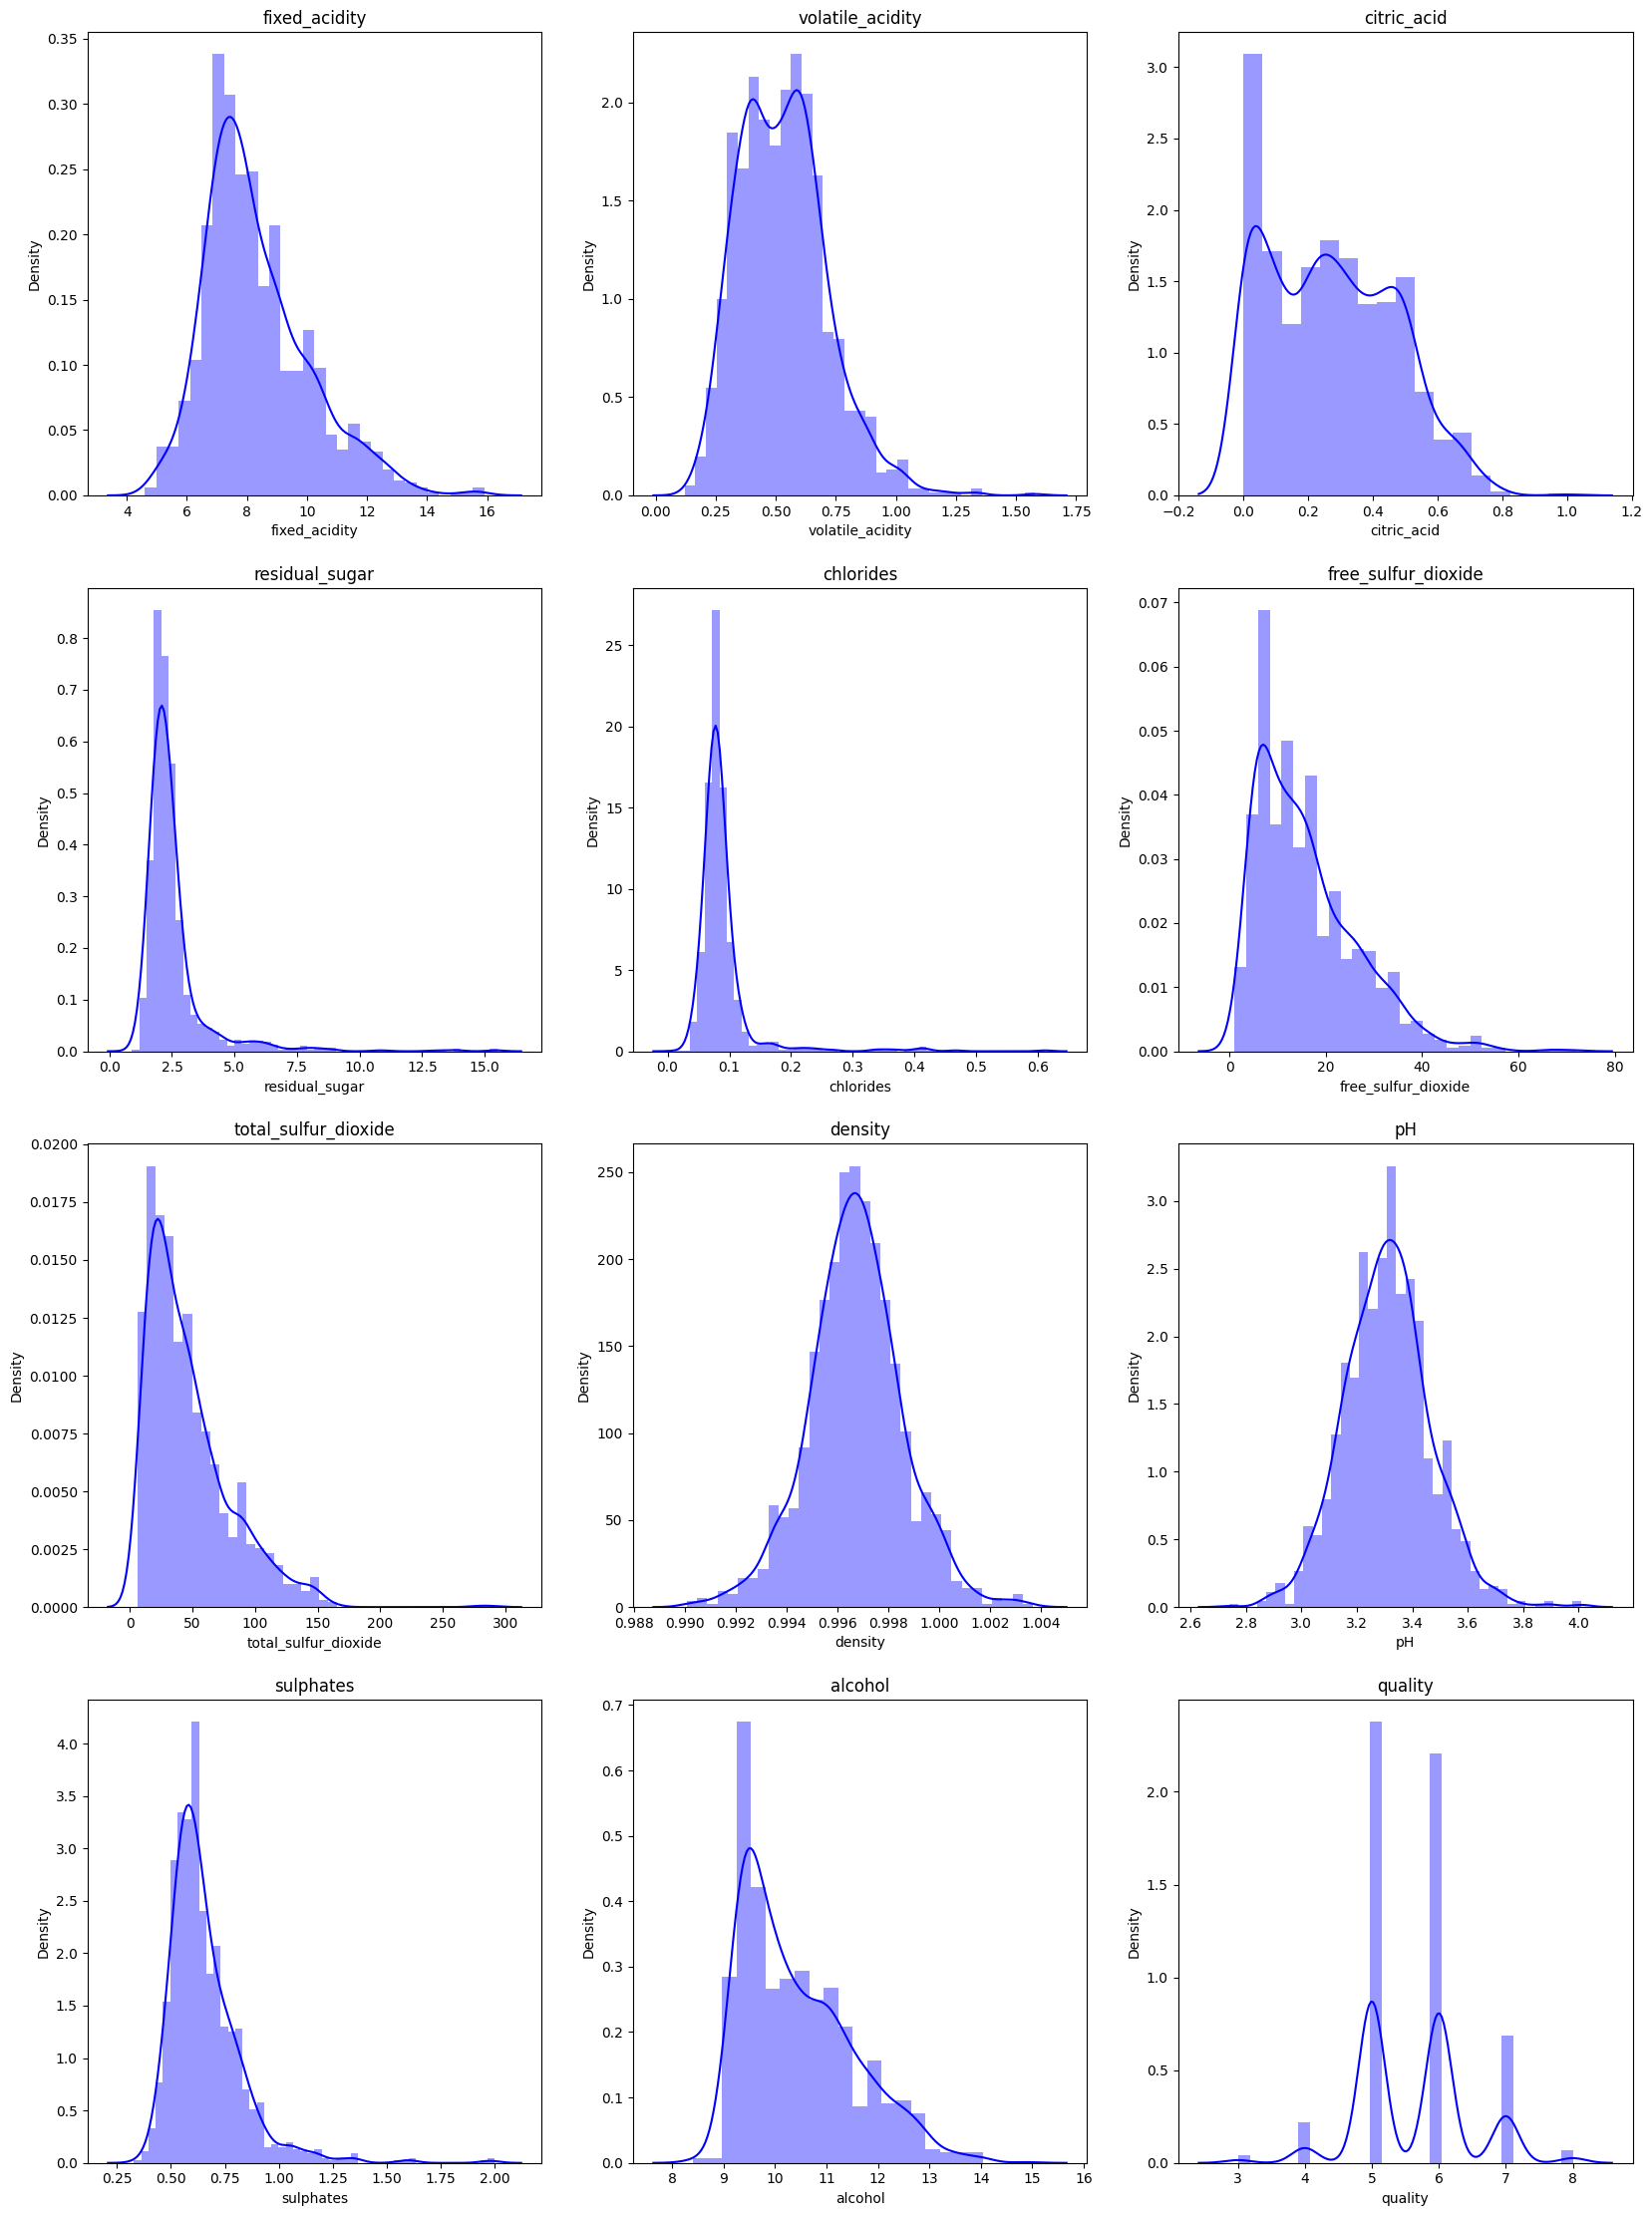

In [18]:
column=new_df.iloc[:]
plt.figure(figsize=(20,35))
for i in range(len(column.columns)):
    plt.subplot(5,3,i+1)
    sns.distplot(column[column.columns[i]],color='b')
    plt.title(column.columns[i])

here we saw the distrubution polt some data are normal distribution some are not that's why we will transform those column

<Axes: >

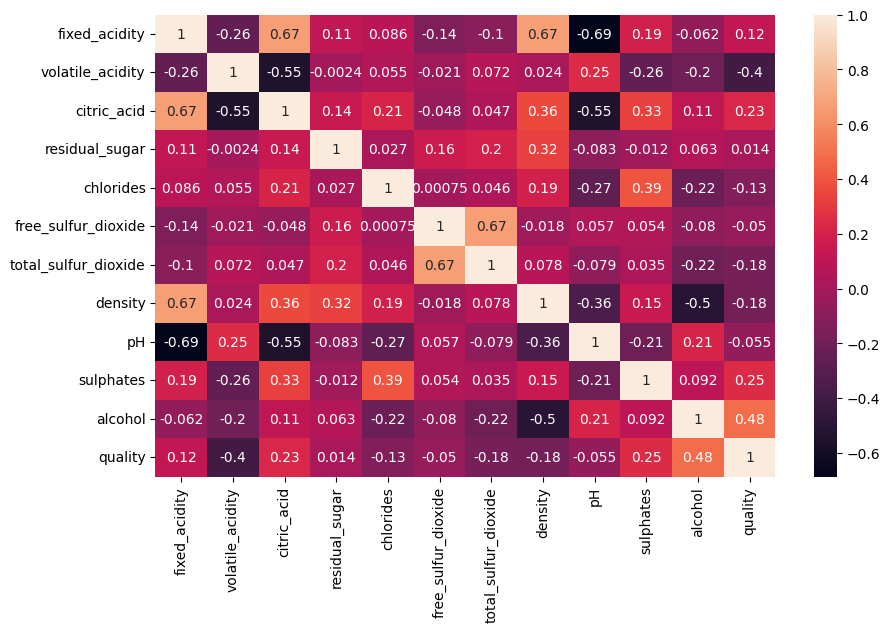

In [19]:
plt.figure(figsize=(10,6))
sns.heatmap(new_df.corr(),annot=True)

In [20]:
#new_df=new_df.drop(columns=['residual_sugar','free_sulfur_dioxide','pH'],axis=1)

In [21]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


# Data Spliting for training and testing

In [22]:
x=new_df.drop('quality',axis=1)
y=new_df['quality']

In [23]:
from imblearn.over_sampling import SMOTE

In [24]:
smote=SMOTE()

In [25]:
X_res,y_res=smote.fit_resample(x,y)

In [26]:
X_res

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,7.400000,0.700000,0.000000,1.900000,0.076000,11.000000,34.000000,0.997800,3.510000,0.560000,9.400000
1,7.800000,0.880000,0.000000,2.600000,0.098000,25.000000,67.000000,0.996800,3.200000,0.680000,9.800000
2,7.800000,0.760000,0.040000,2.300000,0.092000,15.000000,54.000000,0.997000,3.260000,0.650000,9.800000
3,11.200000,0.280000,0.560000,1.900000,0.075000,17.000000,60.000000,0.998000,3.160000,0.580000,9.800000
4,7.400000,0.660000,0.000000,1.800000,0.075000,13.000000,40.000000,0.997800,3.510000,0.560000,9.400000
...,...,...,...,...,...,...,...,...,...,...,...
3457,7.787032,0.367738,0.355159,1.741931,0.063935,4.257926,12.580691,0.995648,3.280317,0.928083,10.712825
3458,11.807842,0.498899,0.689532,4.028056,0.080531,6.000000,22.906480,0.998761,3.087180,0.740784,11.993667
3459,9.192822,0.452273,0.427727,2.546172,0.073230,6.614833,16.538278,0.994589,3.176914,0.687679,12.130383
3460,7.244941,0.375506,0.307753,1.955059,0.060045,15.449411,27.876472,0.994601,3.232247,0.746518,11.322471


**Splitting training abd test data**

In [83]:
#kfold
X_train,X_test,y_train,y_test=train_test_split(X_res,y_res,test_size=0.25,shuffle=True,random_state=0)

In [84]:
print('The shape of X train data',X_train.shape,'\n The shape of test data',X_test.shape)
print('The shape of y train data',y_train.shape,'\n The shape of y test data',y_test.shape)

The shape of X train data (2596, 11) 
 The shape of test data (866, 11)
The shape of y train data (2596,) 
 The shape of y test data (866,)


# Feature Scaling

In [85]:
from sklearn.preprocessing import MinMaxScaler

def standard_scalar(X_train,X_test):
    scalar=StandardScaler()
    
    X_train_scale=scalar.fit_transform(X_train)
    X_test_scale=scalar.transform(X_test)
    
    return X_train_scale,X_test_scale

X_train_scale,X_test_scale=standard_scalar(X_train,X_test)


In [86]:
X_test_scale

array([[ 0.68854417, -0.64064845, -0.13165372, ..., -0.9295066 ,
         0.44148481, -0.61813759],
       [-0.24363197, -1.32227278,  0.47813036, ...,  0.06691437,
         0.0853609 ,  0.8041443 ],
       [-0.50045923, -0.35903584, -0.36589586, ...,  0.38022364,
         0.07372666, -0.64139794],
       ...,
       [-1.93432392, -0.70138673, -0.05253221, ...,  2.39872176,
         0.55617831,  2.68518553],
       [-0.65782996,  1.5793071 , -0.95119228, ...,  1.51814707,
        -0.32537358,  0.45838412],
       [ 0.62896115, -1.1262446 ,  0.80311222, ..., -0.45843162,
         1.17776009,  0.73668669]])

In [87]:
X_train_scale

array([[-0.50916003, -0.73927585, -0.05980481, ..., -0.28333068,
         0.31062376,  0.8016312 ],
       [-0.18784889,  0.50794695, -0.23094513, ..., -0.59879796,
        -0.72428439, -1.04022606],
       [-0.83152534, -0.87276176,  0.61095361, ...,  0.91208605,
         1.003446  ,  2.06980743],
       ...,
       [-0.74881679,  1.67754624, -1.28114721, ...,  1.75688919,
        -0.49068375, -0.29504872],
       [-1.92190723, -0.42295281, -0.65527138, ...,  1.20003698,
         1.3403287 ,  2.19555149],
       [-0.51498192, -1.07547736,  0.6208506 , ...,  0.55397594,
         0.52729044,  0.59102188]])

# Support vector mahine algorithm

In [88]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,GradientBoostingRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier


In [89]:
lr = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
svm = SVC(kernel='linear')
#gnb = GaussianNB()
knn=KNeighborsClassifier()



model_list = [lr,dt,rf,svm,knn]


train_acc = []
test_acc = []

for i in model_list:
    i_model = i.fit(X_train_scale,y_train)
    ytrain_pred = i_model.predict(X_train_scale)
    ytest_pred = i_model.predict(X_test_scale)
    train_acc.append(accuracy_score(y_train,ytrain_pred))
    test_acc.append(accuracy_score(y_test,ytest_pred))


In [90]:
model_summary=pd.DataFrame({'Model':['lr','dt','rf','svm','knn'],'Train_accuracy':train_acc,'Test_acuracy':test_acc})
model_summary

,Model,Train_accuracy,Test_acuracy
0,lr,0.607473,0.613164
1,dt,1.000000,0.719400
2,rf,1.000000,0.812933
3,svm,0.631356,0.639723
4,knn,0.832820,0.734411


# hyperparameter Tuning on svm

In [91]:
from sklearn.model_selection import GridSearchCV
param= {'C': [1,1.5,2,2.5], 'gamma': [0.1,0.5,0.6,1],
              'kernel': ['rbf', 'poly', 'sigmoid']}
grid = GridSearchCV(estimator=svm, param_grid=param,scoring='accuracy',cv=5).fit(X_train_scale,y_train)


In [92]:
grid.best_params_

{'C': 2.5, 'gamma': 0.6, 'kernel': 'rbf'}

In [93]:
svc_model2=SVC(C=2.5,gamma=0.6,kernel='rbf')
svc_model2=svm.fit(X_train_scale,y_train)

In [94]:
ytrain_pred_svm=svc_model2.predict(X_train_scale)
ytest_pred_svm=svc_model2.predict(X_test_scale)


In [95]:
# Accuracy Score
print("The Training accuracy score of regularized SVM  is: ",accuracy_score(y_train,ytrain_pred_svm))
print("The Testing accuracy score of regularized SVM is: ",accuracy_score(y_test,ytest_pred_svm))

The Training accuracy score of regularized SVM  is:  0.6313559322033898
The Testing accuracy score of regularized SVM is:  0.6397228637413395


# Hyper parameter tunning on DecisionTreeClassifier model

In [96]:
dt = DecisionTreeClassifier()
params=[{'criterion':['gini','entropy'],
             'max_depth':range(2,5),
             'min_samples_leaf':range(2,4),
             }]
grd = GridSearchCV(estimator=dt,param_grid=params,scoring='accuracy',cv=10)

dt_model = grd.fit(X_train_scale,y_train)

dt_model.best_params_

{'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 3}

In [97]:
dt = DecisionTreeClassifier(criterion=dt_model.best_params_.get('criterion'),
                           max_depth=dt_model.best_params_.get('max_depth'),
                           min_samples_leaf=dt_model.best_params_.get('max_depth'))

dt_model = dt.fit(X_train_scale,y_train)

ytrain_pred_dt = dt_model.predict(X_train_scale)
ytest_pred_dt = dt_model.predict(X_test_scale)

In [98]:
print("The Training accuracy score of regularized Decision tree is: ",accuracy_score(y_train,ytrain_pred_dt))
print("The Testing accuracy score of regularized Decision tree is: ",accuracy_score(y_test,ytest_pred_dt))

The Training accuracy score of regularized Decision tree is:  0.5689522342064715
The Testing accuracy score of regularized Decision tree is:  0.5415704387990762


# Hyperparameter tunning on Random Forest Model

In [99]:
rf = RandomForestClassifier()
params=[{'n_estimators':[50,100,150,200],
       'criterion':['gini','entropy'],
             'max_depth':range(2,5),
             'min_samples_leaf':range(2,5),
             }]

grd = GridSearchCV(estimator=rf,param_grid=params,cv=3)

rf_model = grd.fit(X_train_scale,y_train)

rf_model.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'min_samples_leaf': 3,
 'n_estimators': 50}

In [100]:
rf = RandomForestClassifier(criterion=rf_model.best_params_.get('criterion'),
                           max_depth=rf_model.best_params_.get('max_depth'),
                           min_samples_leaf=rf_model.best_params_.get('max_depth'),
                           n_estimators=rf_model.best_params_.get('n_estimators'))

rf_model = rf.fit(X_train_scale,y_train)

ytrain_pred_rf = rf_model.predict(X_train_scale)
ytest_pred_rf = rf_model.predict(X_test_scale)

In [101]:
print("The Training accuracy score of regularized Randomforest is: ",accuracy_score(y_train,ytrain_pred_rf))
print("The Testing accuracy score of regularized Randomforest is: ",accuracy_score(y_test,ytest_pred_rf))

The Training accuracy score of regularized Randomforest is:  0.6829738058551618
The Testing accuracy score of regularized Randomforest is:  0.6547344110854504


In [102]:
lr=LogisticRegression()
param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [50, 100,150, 200]
    }
]

clf = GridSearchCV(lr, param_grid = param_grid, cv = 10, verbose=True, n_jobs=-1)

lr_model=clf.fit(X_train_scale,y_train)

Fitting 10 folds for each of 1600 candidates, totalling 16000 fits


In [103]:
lr_model.best_params_

{'C': 1.623776739188721,
 'max_iter': 50,
 'penalty': 'l2',
 'solver': 'newton-cg'}

In [104]:
lr=LogisticRegression(penalty='l2',
                      class_weight=lr_model.best_params_.get('class_weight'),
                      solver=lr_model.best_params_.get('solver'),
                      max_iter=lr_model.best_params_.get('max_iter'))

lr_model_hp=lr.fit(X_train_scale,y_train)

ytrain_pred_lr = lr_model_hp.predict(X_train_scale)
ytest_pred_lr = lr_model_hp.predict(X_test_scale)

In [105]:
print("The Training accuracy score of regularized Logisticregression is: ",accuracy_score(y_train,ytrain_pred_lr))
print("The Testing accuracy score of regularized Logisticregression is: ",accuracy_score(y_test,ytest_pred_lr))

The Training accuracy score of regularized Logisticregression is:  0.6074730354391371
The Testing accuracy score of regularized Logisticregression is:  0.6131639722863741


# Hyper parameter tunning on gradient boost classifier

In [106]:
gbc_param={'n_estimators':[10,20,30,40,50,55,60,70,80,90],
          'learning_rate':[0.001,0.002,0.006,0.05,0.09],
          'max_depth':range(2,16,2),
          'min_samples_leaf':range(1,10,2)}

In [107]:
hp_summary=pd.DataFrame()
hp_summary['model']=pd.Series(['svm','dt','rfc','lr'])
hp_summary['train_accuracy']=pd.Series([accuracy_score(y_train,ytrain_pred_svm),
                                      accuracy_score(y_train,ytrain_pred_dt),
                                      accuracy_score(y_train,ytrain_pred_rf),
                                      accuracy_score(y_train,ytrain_pred_lr)])
hp_summary['test_accuracy']=pd.Series([accuracy_score(y_test,ytest_pred_svm),
                                      accuracy_score(y_test,ytest_pred_dt),
                                      accuracy_score(y_test,ytest_pred_rf),
                                      accuracy_score(y_test,ytest_pred_lr)])

**hyperparameter tunning model accuracy**

In [108]:
hp_summary

,model,train_accuracy,test_accuracy
0,svm,0.631356,0.639723
1,dt,0.568952,0.541570
2,rfc,0.682974,0.654734
3,lr,0.607473,0.613164


**Without hyperparameter tunning model**

In [109]:
model_summary

,Model,Train_accuracy,Test_acuracy
0,lr,0.607473,0.613164
1,dt,1.000000,0.719400
2,rf,1.000000,0.812933
3,svm,0.631356,0.639723
4,knn,0.832820,0.734411


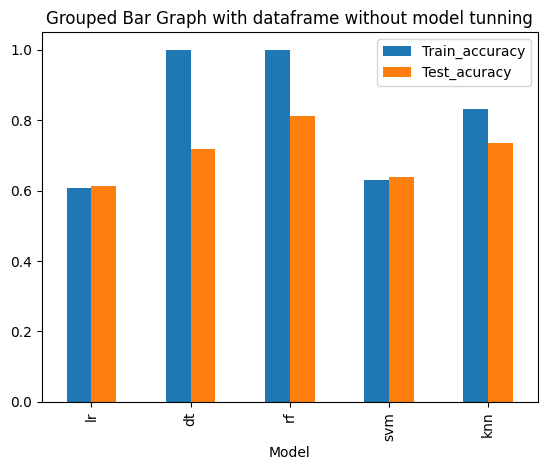

In [110]:
model_summary.plot(x='Model',
        kind='bar',
        stacked=False,
        title='Grouped Bar Graph with dataframe without model tunning')
plt.show()

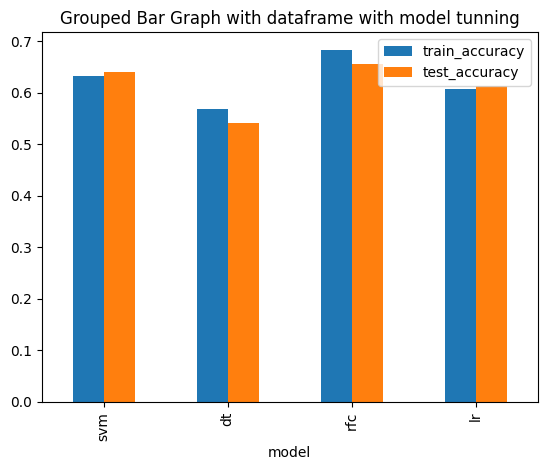

In [111]:
hp_summary.plot(x='model',
        kind='bar',
        stacked=False,
        title='Grouped Bar Graph with dataframe with model tunning')
plt.show()

**We can clearly see the select vector machine preety much giving prediction result.**